In [3]:
import json
import re

def extract_substring(url):
    pattern = r'://(.*?)/'
    match = re.search(pattern, url)
    if match:
        return match.group(1)
    else:
        return None
    
path_file = '/home/qiuyang/workplace/swift/examples/pytorch/llm/my_data/data/c4_data_duiqi/total_data_v1.0.json'

i = 0

# 创建一个空字典
url_dict = {}

def add_or_update_key(key):
    # 如果键不存在，则设置值为0
    if key not in url_dict:
        url_dict[key] = 1
    else:
        # 如果键存在，则值加1
        url_dict[key] += 1
total = 0
with open(path_file, 'r') as input_file:
    # 逐行读取文件内容
    for line in input_file:
        i = i + 1
        # 解析JSON数据
        data = json.loads(line)

        url = data['url']

        wangzhi = extract_substring(url)
        if wangzhi != None:
            add_or_update_key(wangzhi)
        else:
            print(url)
# print(total)




https://danettinger.com
https://lankan.org
https://rhchospitality.com
http://www.ianpottsartist.com
http://jadebwalsh.blogspot.com
https://www.floridarecorder.com
http://www.art-by-brennan.com
https://egypt-museum.com
https://www.carlisleschesapeake.com
http://dokument.org?lang=en
http://www.art-by-brennan.com
https://egypt-museum.com
https://www.carlisleschesapeake.com


In [8]:
# 创建新的字典来存储更新后的键和值
new_url_dict = {}

# 遍历原字典中的每个键和值
for key, value in url_dict.items():
    # 检查键是否以'www.'开头
    if key.startswith('www.'):
        # 去掉'www.'部分
        new_key = key.replace('www.', '', 1)
    else:
        new_key = key
    # 将新键和值添加到新字典中
    new_url_dict[new_key] = value


# 计算字典中键的数量
key_count = len(new_url_dict)
print(key_count)
# 计算字典中所有值的总和
value_sum = sum(new_url_dict.values())
print(value_sum)

# 按值从大到小排序字典，并提取前100个元素
top_100_urls = dict(sorted(new_url_dict.items(), key=lambda item: item[1], reverse=True)[:50])
# top_100_urls['reuters.com'] = 97632
# 打印前100个元素
for url, value in top_100_urls.items():
    print(f"{url}: {value}")




359093
960764
reuters.com: 148623
cnbc.com: 42599
nytimes.com: 33319
cnn.com: 21239
thehill.com: 17483
vice.com: 8903
people.com: 8294
techcrunch.com: 7616
mashable.com: 5896
businessinsider.com: 5770
axios.com: 4543
politico.com: 4072
refinery29.com: 3715
theverge.com: 3652
economist.com: 3605
buzzfeednews.com: 3230
vox.com: 3142
foxnews.com: 2959
news.vice.com: 2384
hyperallergic.com: 2285
gizmodo.com: 2029
tmz.com: 1649
wired.com: 1403
newrepublic.com: 873
en.wikipedia.org: 679
aljazeera.com: 562
theguardian.com: 551
washingtonpost.com: 483
newyorker.com: 446
rt.com: 429
latimes.com: 348
straitstimes.com: 346
alibaba.com: 338
ibtimes.co.uk: 311
forbes.com: 301
yatra.com: 295
uk.reuters.com: 292
countrycallingcodes.com: 290
monfrague.online: 289
marketwired.com: 287
telegraph.co.uk: 287
dailymail.co.uk: 265
en.m.wikipedia.org: 257
huffpost.com: 253
voanews.com: 252
rbth.com: 252
express.co.uk: 247
sputniknews.com: 238
irishtimes.com: 214
prweb.com: 213


348008


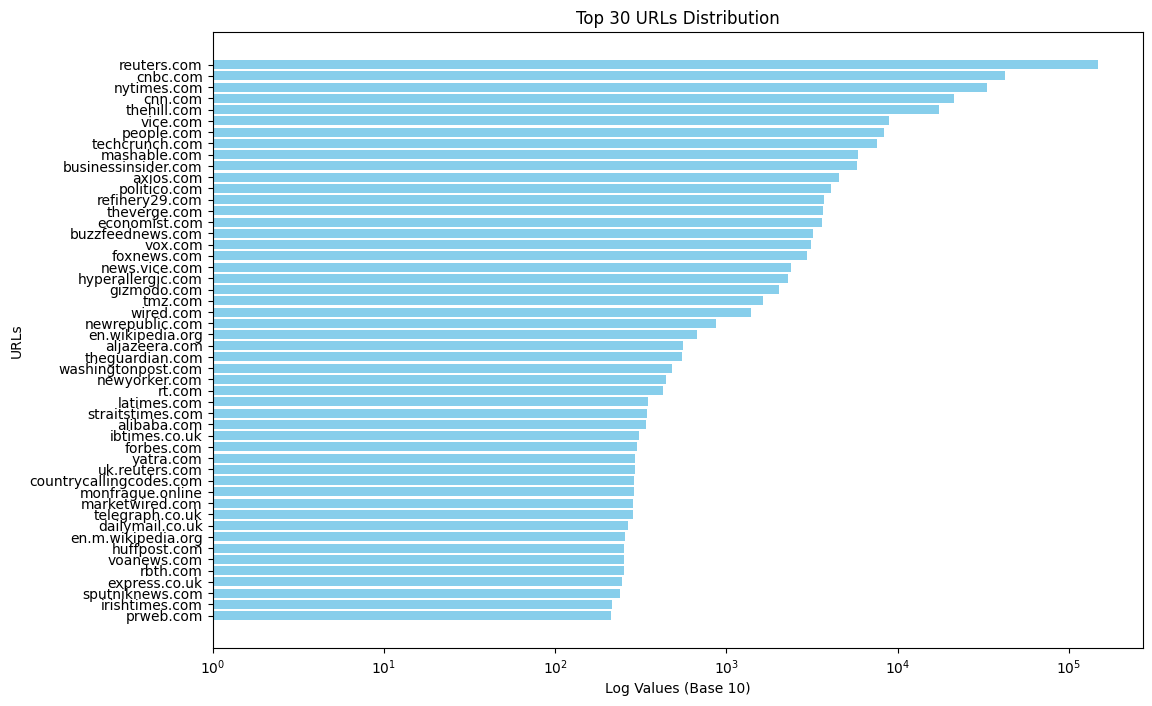

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# # 提取键和值
# urls = list(top_100_urls.keys())
# values = list(top_100_urls.values())

# value_sum = sum(top_100_urls.values())
# print(value_sum)

# # 创建横向的柱形图
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.barh(urls, values, color='skyblue')

# # 添加标题和标签
# ax.set_title('Top 30 URLs Distribution')
# ax.set_xlabel('Values')
# ax.set_ylabel('URLs')

# # 反转Y轴，这样值最大的在上面
# ax.invert_yaxis()

# # 显示图形
# plt.show()
# 提取键和值
urls = list(top_100_urls.keys())
values = list(top_100_urls.values())

value_sum = sum(top_100_urls.values())
print(value_sum)

# 将值转换为以10为底的对数值
log_values = np.log10(values)

# 创建横向的柱形图
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(urls, log_values, color='skyblue')

# 设置 x 轴为指数刻度
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'$10^{{{int(x)}}}$'))

# 添加标题和标签
ax.set_title('Top 30 URLs Distribution')
ax.set_xlabel('Log Values (Base 10)')
ax.set_ylabel('URLs')

# 反转Y轴，这样值最大的在上面
ax.invert_yaxis()

# 显示图形
plt.show()


In [11]:
print(len(urls))
print(len(values))

50
50


(50.0, -1.0)

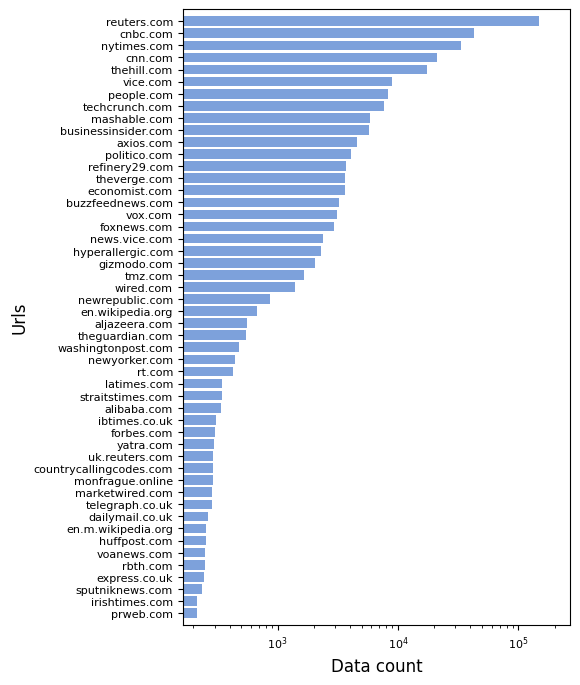

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
import statistics
from matplotlib.patches import FancyArrow
from collections import Counter
import json

top_country = urls
top_country_count = values

# 绘图
fig, ax = plt.subplots(figsize=(5, 8))
# 反转 y 轴
ax.invert_yaxis()
# 去除上方和右侧的空白
ax.margins(0)

plt.xscale('log')
plt.barh(top_country, top_country_count, height=0.8, color='#7da1db')

plt.ylabel('Urls', fontsize=12)
plt.xlabel('Data count', fontsize=12)
# 设置 x 轴刻度字体大小
ax.tick_params(axis='x', labelsize=8)
# 设置 y 轴刻度字体大小
ax.tick_params(axis='y', labelsize=8)
# plt.xticks([2000, 6000, 10000])
# 设置 x/y轴的范围
plt.xlim(10**(np.log10(np.min(top_country_count))*0.95), 10**(np.log10(np.max(top_country_count))*1.05))
plt.ylim(50, -1)